# Data Science - Regressão Linear II

## Conhecendo o Dataset

In [0]:
import pandas as pd

In [2]:
dados_df = pd.read_csv('https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-regressao-linear/dataset.csv', sep=';')

dados_df.head(7)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
5,1449993,143,5.119767,0.043398
6,464000,107,7.846771,0.157954


In [0]:
dados_df.shape

(5000, 4)

## Análises iniciais

### Estatísticas descritivas

In [0]:
dados_df.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


### Matriz de correlação

O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [0]:
dados_df.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


## Comportamento da Variável Dependente (Y)

In [0]:
import seaborn as sns

In [0]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

<h2>Box plot da variável <b>dependente</b> (y)</h2>



<img width='700px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/Box-Plot.png'>

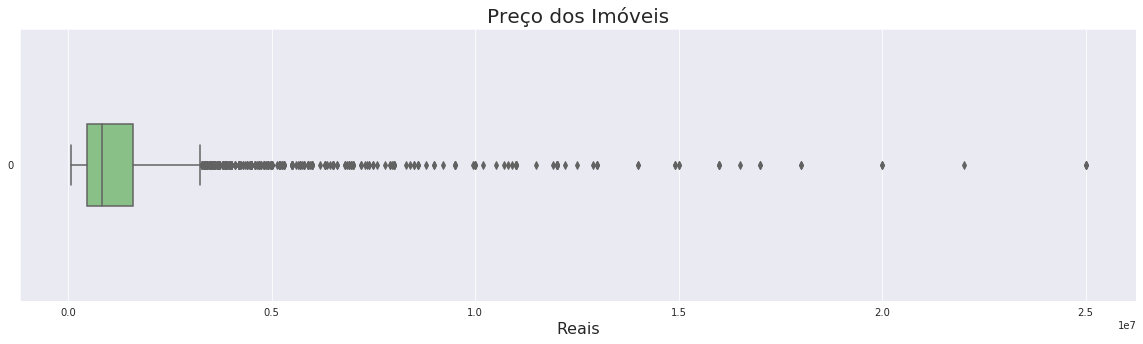

In [0]:
ax = sns.boxplot(data=dados_df['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Aqui vemos que uma grande quantidade de dados estão fora da distribuição normal, estes são chamados de outliers

## Distribuição de Frequências

<h2>Distribuição de frequências da variável <b>dependente</b> (y)</h2>

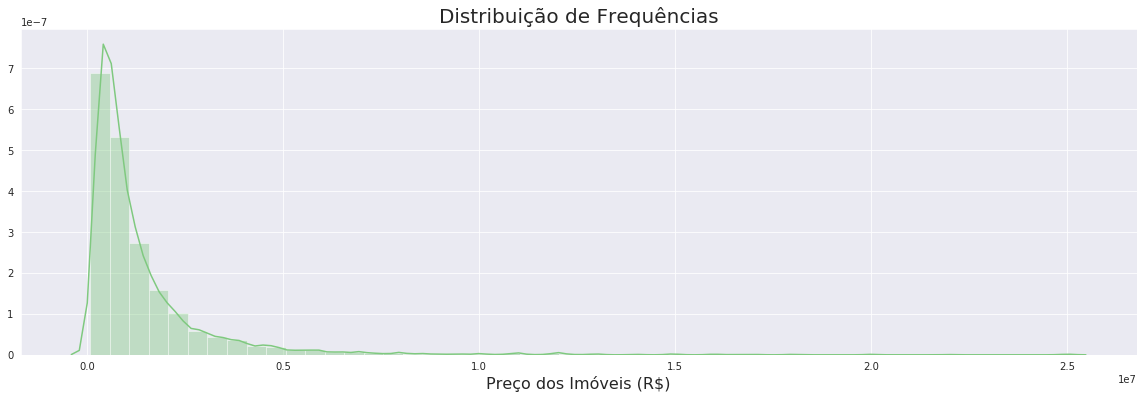

In [5]:
ax = sns.distplot(dados_df['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='800px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/Box-Plot%20II.png'>

Como podemos ver, este Dataset possui uma distribuição normal assimétrica a direita, o ideal  é que seja simetrica

## Dispersão entre as Variáveis

<h2>Gráficos de dispersão entre as variáveis do dataset</h2>

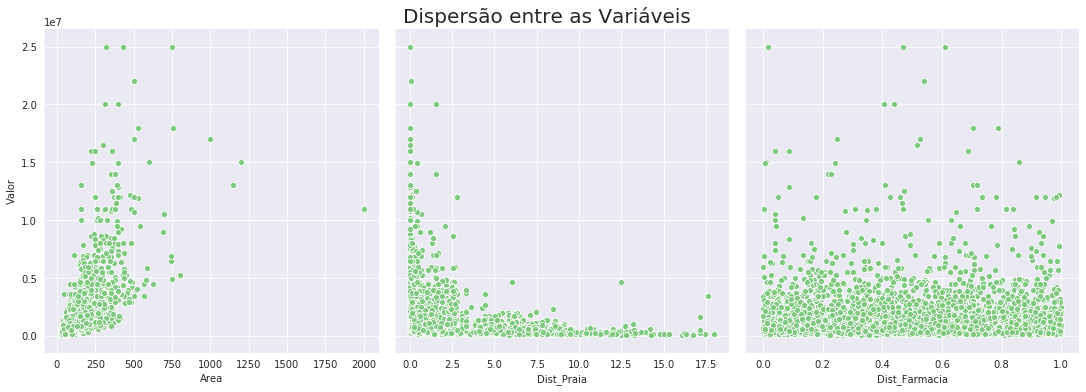

In [0]:
ax = sns.pairplot(dados_df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Os gráficos acima mostram o quão aos dados de cada coluna do Dataset estão dispersos em relação ao Valor

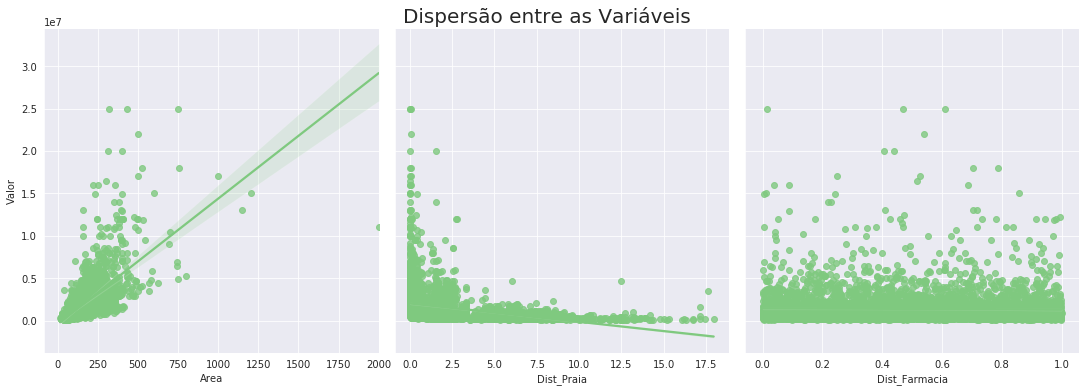

In [0]:
ax = sns.pairplot(dados_df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Ao traçar uma reta para tentar separa-los, vemos quão não são tão faceis assim quando dispersos desta forma. O ideal é tratarmos os dados para que os dados sejam lienarmente separáveis e que a distribuição normal fique mais simétrica. 

## Aplicando transformações nos Dados

### Distribuição Normal

Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. 

Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).

Para que os dados ganhem este efeito, podemos aplicar transformação logarítimica aos dados do Dataset.

Obs: Lembrando que log de 0 é indefinido, portanto é uma boa prática somar 1 às variáveis que podem possuir valor 0. 

In [0]:
import numpy as np

In [7]:
dados_df['log_Valor'] = np.log(dados_df['Valor'])
dados_df['log_Area'] = np.log(dados_df['Area'])
dados_df['log_Dist_Praia'] = np.log(dados_df['Dist_Praia'] + 1)
dados_df['log_Dist_Farmacia'] = np.log(dados_df['Dist_Farmacia'] + 1)

dados_df.head(7)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946
5,1449993,143,5.119767,0.043398,14.187069,4.962845,1.811524,0.042483
6,464000,107,7.846771,0.157954,13.047640,4.672829,2.180053,0.146655


### Distribuição de frequências da variável *dependente transformada* (y)

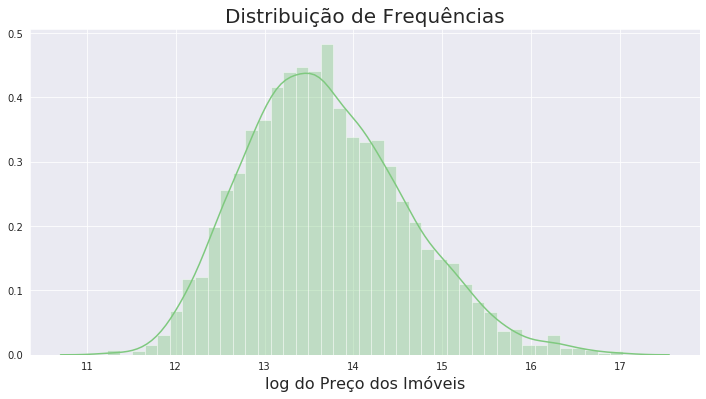

In [0]:
ax = sns.distplot(dados_df['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

Como podemos ver, ao aplicar a transformação na variável valor do Dataset, esta mostra uma distribuição normal.

Vamos comparar com a anterior:

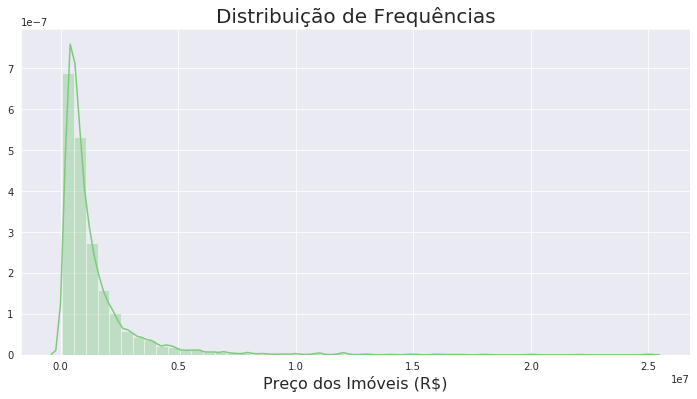

In [0]:
ax = sns.distplot(dados_df['Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

## Dispersão entre as Variáveis transformadas

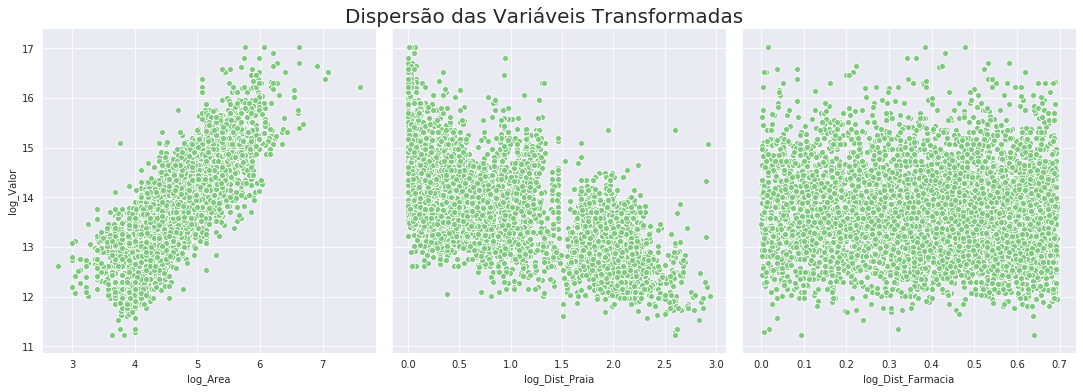

In [0]:
ax = sns.pairplot(dados_df, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão das Variáveis Transformadas', fontsize=20, y=1.05)
ax

Agora mostrando a separação linear

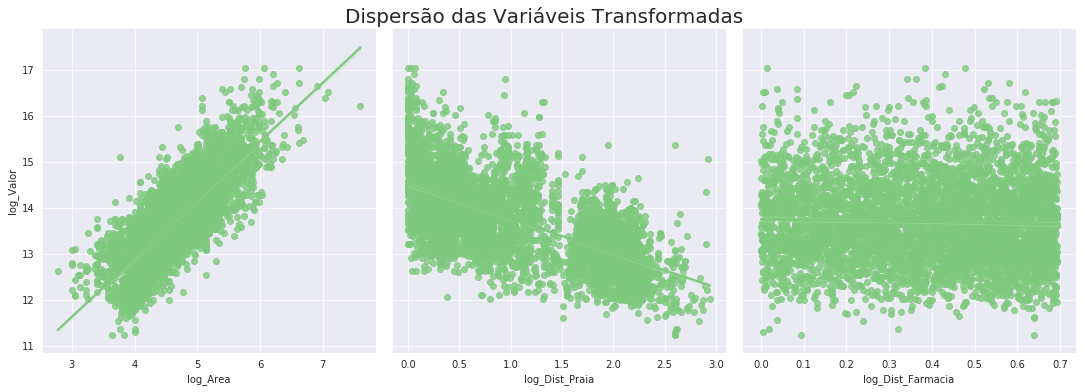

In [0]:
ax = sns.pairplot(dados_df, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão das Variáveis Transformadas', fontsize=20, y=1.05)
ax

##  Criando os Datasets de treino e teste

Uma vez que os dados foram obtidos, transformados e analisados, podemos agora utilizá-lo para obter informações, previsões futuras, classificar dados novos e etc...

Para isso devemos criar e tratar nosso mode-lo. O primeiro passo é separar os dados em dados treino, dados de teste, target (no caso de classificação) e variaveis explicativas (parâmetros que serão usados para classificar ou prever o target).  

In [0]:
from sklearn.model_selection import train_test_split

Criando uma nova Series para armazenar o Preço dos Imóveis (y)

In [0]:
y = dados_df['log_Valor']

Criando um novo DataFrame para armazenar as variáveis explicativas (X)

In [0]:
X = dados_df[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

Criando os datasets de treino e de teste de forma aleatoria a fim de não viciar as amostras

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Regressão Linear


A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável **dependente**) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

<img width='800px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/Log-linear.png'>

### Estimando o modelo com statsmodels

In [0]:
import statsmodels.api as sm

Como a equação anterior mostra, é preciso definir uma constante K, para isso o statsmodel tem uma função para adicionar essa constante aos dados de treino

In [13]:
X_train_com_constante = sm.add_constant(X_train)

X_train_com_constante.head(7)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
4561,1.0,5.438079,1.182793,0.628547
4229,1.0,4.127134,1.632077,0.176840


Treinando modelo com Ordinary least squares (OLS)


In [0]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

### Avaliando as estatísticas de teste do modelo

In [15]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:17:13   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>R²</h3>
Também chamado de coeficiente de determinação, é uma medida de ajustamento de um modelo estatístico linear generalizado. Este pode variar entre 0 e 1, indicando o quanto o modelo consegue explicar os valores observados.

Quanto maior o R² mais explicativo é o modelo, melhor ele se ajusta à amostra, ou seja se o coeficiente de determinação é 0.85, significa que 85% da variável dependente (y) pode ser explicada pelos regressores presentes no modelo.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

<h3>R² Ajustado</h3>
Semelhante ao coeficiente de determinação, mas se ajusta aos graus de liberdade (conforme vai adicionando variáveis, o grau de liberdade tende a diminuir).

Enquanto o R² não abaixa (ou permanece igual ou aumenta), este pode diminuir.


<h3>Teste F:</h3>
Testa a significância dos parâmetros do modelo conjuntamente.
Prob (F-statistic) indica a aceitação do teste. Valores acima de 0.05, os parâmetros não são estatisticamente significantes.

No caso, as variáveis do modelo são estatisticamente significantes para determinar o valor da variável dependente (y).


<h3>Teste T:</h3>
Testa a significância de cada parâmetros do modelo.
P>|t| indica a aceitação do teste. Valores acima de 0.05, o parâmetro em questão não é estatisticamente significante.

No modelo gerado, a variável **log_Dist_Farmacia** não é significante para determinar o valor da variável dependente (y), logo pode ser removida do modelo.




### Removendo parâmetro insignificante para o modelo

In [0]:
X = dados_df[['log_Area', 'log_Dist_Praia']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [18]:
X_train_com_constante = sm.add_constant(X_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [20]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:17:29   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
log_Dist_Praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como podemos ver, Prob (F-statistic) e P>|t| são maiores que 0.05, portanto todas as variáveis podem descrever o modelo corretamente.

## Estimando o Modelo usando os Dados de Treino com SKLearn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [0]:
modelo = LinearRegression()

In [23]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Obtendo o R² (coeficiente de determinação) do modelo estimado com os dados de *Treino* (X_train e y_train)


In [24]:
print(f'R² = {modelo.score(X_train, y_train).round(3)}')

R² = 0.805


### Gerando previsões para os dados de *Teste* (X_test) utilizando *predict*

In [0]:
y_previsto = modelo.predict(X_test)

### Obtendo o coeficiente de determinação para as previsões do modelo

In [26]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(3)}')

R² = 0.79


## Realizando previsões

### Prevendo dados do próprio DF (apenas para exemplificar)

In [27]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [35]:
previsao = modelo.predict(entrada)
previsao

array([14.28482006])

Uma vez que os dados sofreram transformações logaritmicas, devemos inverter a transformação para obter a estimativa real

In [34]:
print('Valor estimado foi de R$', np.exp(previsao[0]))

Valor estimado foi de R$ 1598889.784779439


### Uma aparatamento a um metro da praia e 150m² quanto deverá ser o valor do imóvel?

In [0]:
Area = 150
Dist_Praia = 1

entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 1617664.12


## Interpretação dos Coeficientes Estimados

Em alguns projetos,  Mé interessante medir qual é o efeito das variáveis de maneira individual, e assim descobrir qual é mais significativa para o modelo.

### Obtendo o intercepto do modelo

O coeficiente **intercepto** representa o efeito médio na variável dependente (Y), que neste caso é Preço do Imóveis, tendo todas as variáveis explicativas excluídas do modelo. 

Uma vez que foram aplicadas transofrmações logarítimicas (modelo log-linear),  o intercepto deve ser revertido com o uso da função exponencial e assim ser apresentado o valor real.

In [37]:
modelo.intercept_

9.334916409800329

In [41]:
print("R$ {0:.2f}".format(np.exp(modelo.intercept_)))

R$ 11326.68


### Obtendo os coeficientes de regressão

Os **coeficientes de regressão** $\beta_2$ e $\beta_3$ também são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**.

Os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, ou seja, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [42]:
modelo.coef_

array([ 1.05807818, -0.49061226])

### Analisando coeficientes

In [44]:
# Criando uma lista com os nomes das variáveis do modelo
index = ['Intercepto (log)', 'log Área', 'log Distância da Praia']

# Criando uma lista com os nomes das variáveis do modelo
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto (log),9.334916
log Área,1.058078
log Distância da Praia,-0.490612


<h4>Entendendo como estes Coeficientes se relacionam com a variável dependente</h4>

**Intercepto**: Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de *R$ 11.326,68* (transformação esponencial de 9.334916 uma vez que sofreu transformação logaritimica).

<br/>

**log Área**: Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de *1.05%* no Preço do Imóvel.

<br/>

**log Distância da Praia**: Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um *decréscimo* de *0.49%* no Preço do Imóvel.

## Análises Gráficas dos Resultados do Modelo

### Gerando as previsões do modelo para os dados de Treino (X_train)

In [0]:
y_previsto_train = modelo.predict(X_train)

### Gráfico de dispersão entre valor estimado vs valor real

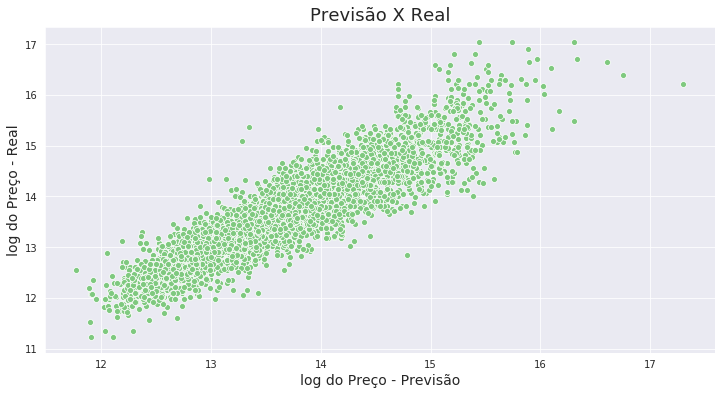

In [46]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

Não tem uma grande dispersão no gráfico, o que indica que nossa estimativa está mais precisa, mas os preços de imóvel são flutuantes e é preciss de mais variáveis para ajustar esse gráfico à realidade.



### Obtendo os resíduos

<img  width='800px' src='https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-modelo-regressao-linear-assimetria-statsmodel/residuo.png'>

In [48]:
residuo = y_train - y_previsto_train
residuo

2661    0.632221
912     0.103178
3042   -0.201268
141     0.798452
3854    0.099376
          ...   
3657    0.103408
979     0.222697
2389   -0.232015
447    -0.246490
2008   -0.195782
Name: log_Valor, Length: 4000, dtype: float64

### Plotando a distribuição de frequências dos resíduos

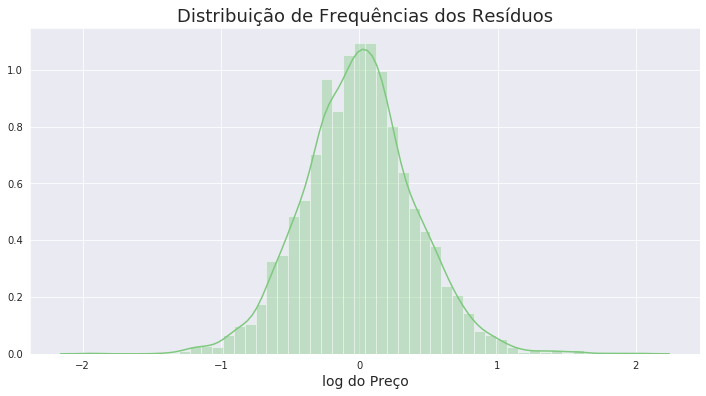

In [49]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax